<a href="https://colab.research.google.com/github/nefro313/Blum-project/blob/main/simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
X_train = np.loadtxt('/content/input.csv',delimiter=',')
y_train = np.loadtxt('/content/labels.csv',delimiter=',')
X_test = np.loadtxt('/content/input_test.csv',delimiter=',')
y_test = np.loadtxt('/content/labels_test.csv',delimiter=',')

In [ ]:
X_train = X_train.reshape(X_train.shape[0],100,100,3)
y_train = y_train.reshape(y_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],100,100,3)
y_test = y_test.reshape(y_test.shape[0],1)

X_train = X_train.astype('int32')
X_test = X_test.astype('int32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
print(X_train.shape[0])

2000


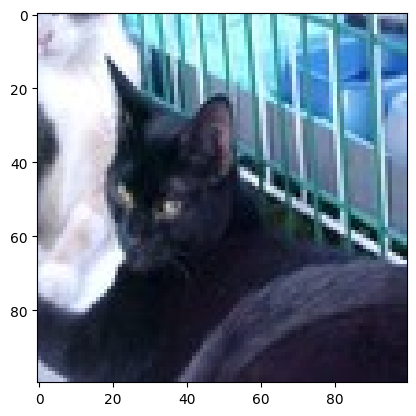

In [ ]:
idx = np.random.randint(0,X_train.shape[0])
plt.imshow(X_train[idx,:])
plt.show()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,strides=2,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(strides=3,pool_size=(2,2)))

model.add(Conv2D(filters=64,strides=3,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 49, 49, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,417 (204.75 KB)

 Trainable params: 52,417 (204.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6697 - loss: 0.6167
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6831 - loss: 0.5984
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6723 - loss: 0.5876
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7210 - loss: 0.5477
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7257 - loss: 0.5447


In [ ]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6332 - loss: 0.6403


[0.609461784362793, 0.6675000190734863]

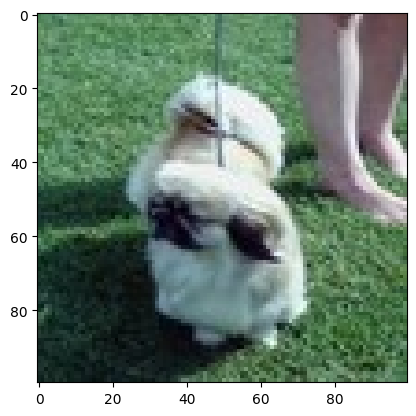

In [ ]:
plt.imshow(X_test[90,:])


In [ ]:
y_pred = model.predict(X_test[9].reshape(1,100,100,3))
print(y_pred)
is_true = y_pred > 0.5
if is_true:
  print('It is a dog')
else:
  print('it is cat')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.4538029]]
it is cat
